## Assignment 6 Solutions
Author: Laura Bissoltan

### Problem 1

In [168]:
#1.1

import numpy as np

x=[0,1.8,5,6,8.2,9.2,12]
y=[26,16.415,5.375,3.5,2.015,2.540,8]

A = np.zeros((7,7))

def f(x0):
    def divdif(x,y,n):
        for i in range(0,n):
            A[i,0]=y[i]
        for j in range(1,n):
            for i in range(0,n-j):
                A[i,j]=(A[i+1,j-1]-A[i,j-1])/(x[i+j]-x[i])
        return A
    
    divdif(x,y,7)
    
    b=[]
    for i in range(7):
        b.append(A[0,i])
               
    s=b[0]
    p = 1
    for i in range(1,7):
        p = p*(x0-x[i-1])
        s = s + b[i]*p
    
    return s

print("Value at x = 3.5 is",f'{f(3.5):.5f}')


Value at x = 3.5 is 9.59375


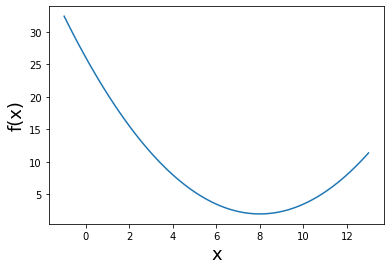

In [169]:
#1.2

from matplotlib import pyplot as plt

z=np.linspace(-1,13,100)
plt.plot(z,f(z))

plt.xlabel("x",size=18)
plt.ylabel("f(x)",size=18)
plt.show()


### Problem 2

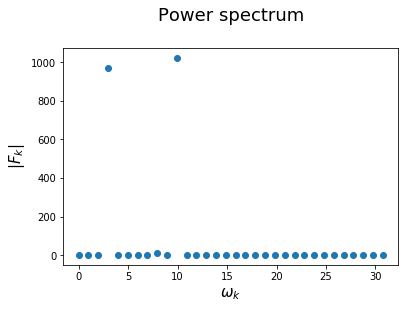

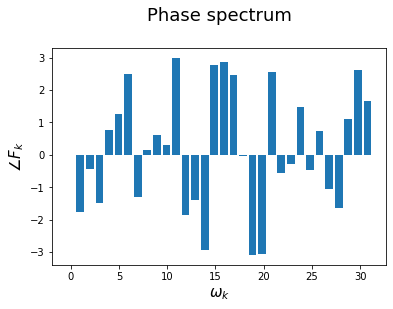

In [170]:
import numpy as np
from numpy import sin,cos,pi
from matplotlib import pyplot as plt

#1.1
dt=0.099
t=np.arange(0,2*pi,dt)
N=len(t)

#1.2
f = cos(10*t)+sin(3*t) + 0.15*np.random.randn(N)
np.random.seed(1234)

#1.3
F=np.fft.fft(f)
S=np.fft.fftfreq(N,dt)

#1.4
plt.scatter(2*pi*S[0:32],np.abs(F[0:32])**2)
plt.title("Power spectrum\n",size=18)
plt.xlabel('$\omega_k$',size=15)
plt.ylabel('$|F_k|$',size=15)
plt.show()

#1.5
plt.bar(2*pi*S[0:32],np.angle(F[0:32]))
plt.title("Phase spectrum\n",size=18)
plt.xlabel('$\omega_k$',size=15)
plt.ylabel('$\\angle F_k$',size=15)
plt.show()


### Problem 3

In [171]:
#3.1

I1 = 0.42241831194644774
print("Exact numerical value is", I1)


Exact numerical value is 0.42241831194644774


In [172]:
#3.2
import numpy as np

def f(x):
    return (x**4*(2-x)**4)/(1+x**2)

b=2
a=0

def g(x):
    return f(((b+a)+(b-a)*x)/2)*((b-a)/2)

def GQ(f,m):
    if m == 2:
        xp = np.array([-0.5774,0.5774]) 
        C = np.array([1.0,1.0]) 
        return np.dot(C,f(xp))
    if m == 3:
        xp = np.array([-0.7746, 0.0, 0.7746])
        C = np.array([0.5556, 0.8889, 0.5556])
        return np.dot(C,f(xp))
    if m == 4:
        xp = np.array([-0.8611, -0.34, 0.34, 0.8611])
        C = np.array([0.3479, 0.6521, 0.6521, 0.3479])
        return np.dot(C,f(xp))
    if m == 5:
        xp = np.array([-0.9062, -0.5385, 0.0, 0.5385, 0.9062])
        C = np.array([0.2369, 0.4786, 0.5689, 0.4786, 0.2369])
        return np.dot(C,f(xp))
    if m == 6:
        xp = np.array([-0.9325, -0.6612, -0.2386, 0.2386, 0.6612, 0.9325])
        C = np.array([0.1713, 0.3608, 0.4679, 0.4679, 0.3608, 0.1713])
        return np.dot(C,f(xp))
    if m == 7:
        xp = np.array([-0.9491, -0.7415, -0.4058, 0.0, 0.4058, 0.7415, 0.9491])
        C = np.array([0.1295, 0.2797, 0.3818, 0.418, 0.3818, 0.2797, 0.1295])
        return np.dot(C,f(xp))
    
print("I_GQ value for m=2:", GQ(g,2))
print("I_GQ value for m=5:", GQ(g,5))
    

I_GQ value for m=2: 0.22415040451952173
I_GQ value for m=5: 0.4211428986425137


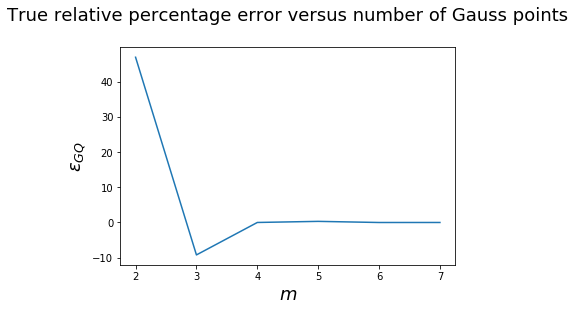

In [173]:
#3.3

from matplotlib import pyplot as plt

lst=[]
for i in range(2,8):
    e_gq=((I1-GQ(g,i))/I1)*100
    lst.append(e_gq)
    
y=lst
x=[2,3,4,5,6,7]
  
plt.plot(x,lst)
plt.title("True relative percentage error versus number of Gauss points\n", size=18)
plt.xlabel(r'$m$',size=18)
plt.ylabel(r'$\epsilon_{GQ}$',size=18)
plt.show()
